# Exploratory Data Analysis

Importing libraries.

In [6]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
import datetime
import calendar
import numpy as np 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from matplotlib.pylab import rcParams
import seaborn as sns

Importing csv file.

In [7]:
df = pd.read_csv('diabetes.csv')

In [8]:
df.head()

,id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,6,148,72,35,0,33.6,0.627,50,1
1,2,1,85,66,29,0,26.6,0.351,31,0
2,3,8,183,64,0,0,23.3,0.672,32,1
3,4,1,89,66,23,94,28.1,0.167,21,0
4,5,0,137,40,35,168,43.1,2.288,33,1


Finding co-relation between columns.

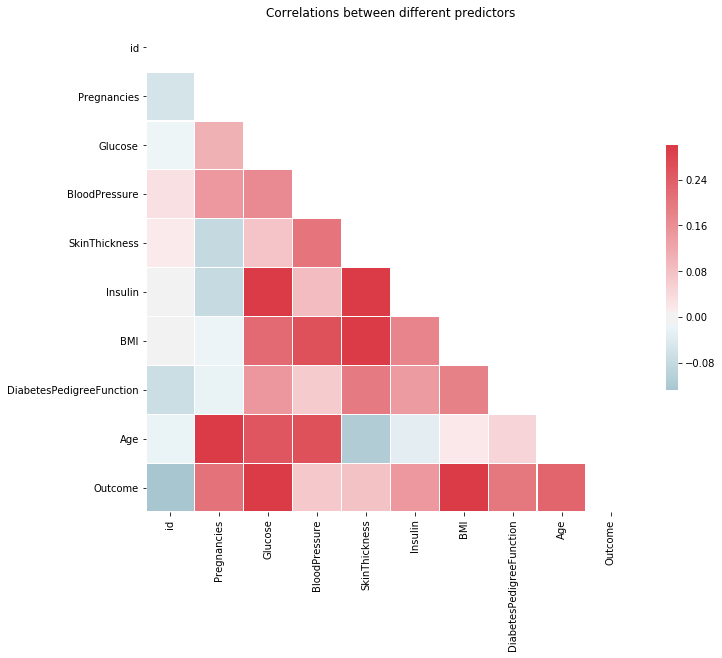

In [9]:
corr_df = df.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr_df, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_df, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title('Correlations between different predictors')
plt.show()

We can see that ‘glucose’ have high correlation between ‘age’ , ‘insulin’ and ‘bmi’. ‘age’ have high correlation with ‘pregnancies’ and ‘BloodPressure’. ‘skinThickness’ have high correlation with ‘DiabetesPedigreeFunction’ , ‘bmi’ and ‘insulin’. 

Now let's find out who are patient or not with respect to age.

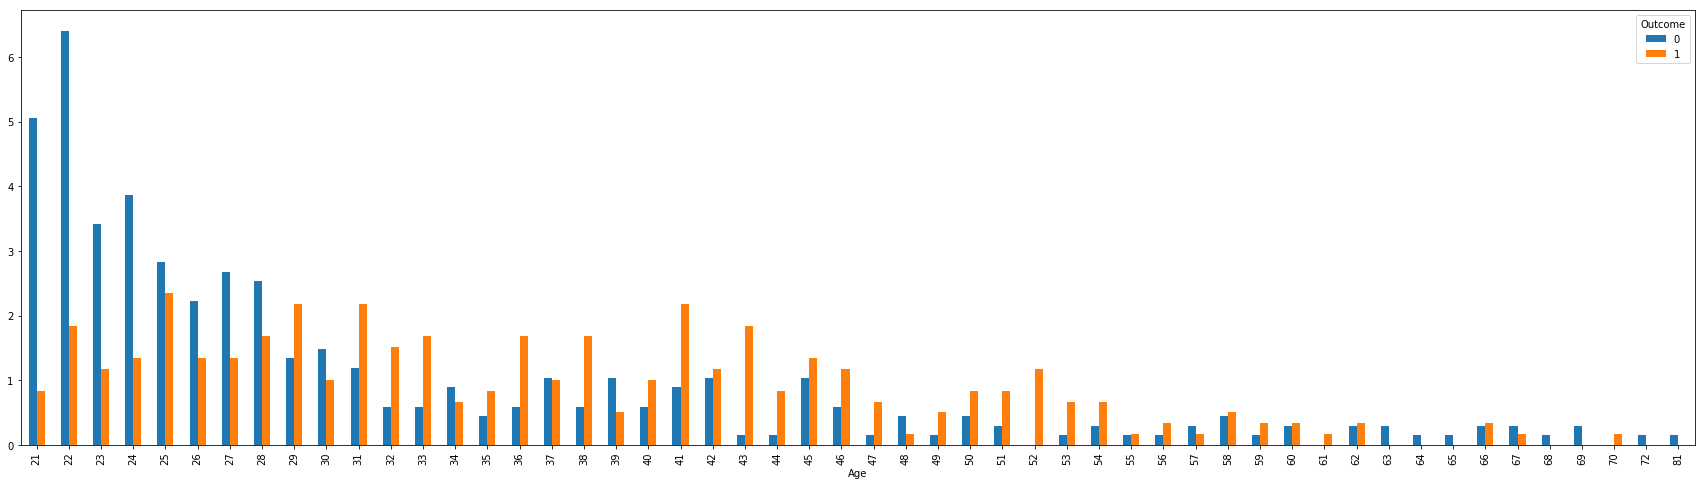

In [10]:
plt.rcParams['figure.figsize'] = (30, 8)
d = df.groupby(['Age', 'Outcome']).size().unstack(level=1)
d = d / d.mean()
p = d.plot(kind='bar')

We can see that in our dataset, frequency of data of younger generation is high as compared to older age data.

Now let's find out how pregancy affects diabetes outcome.

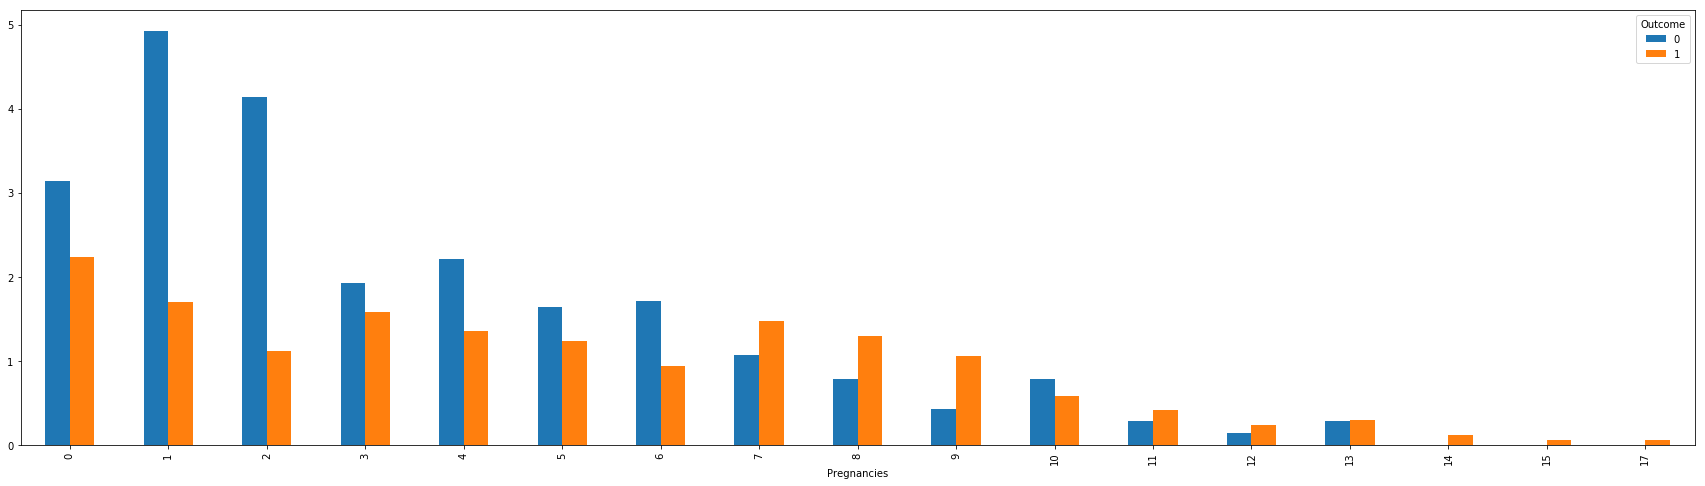

In [11]:
plt.rcParams['figure.figsize'] = (30, 8)
d = df.groupby(['Pregnancies', 'Outcome']).size().unstack(level=1)
d = d / d.count()
p = d.plot(kind='bar')

We have 100% data of patients having diabetes with 14 or more pregnancies.

Let's see how our 'y-axis' is distributed.

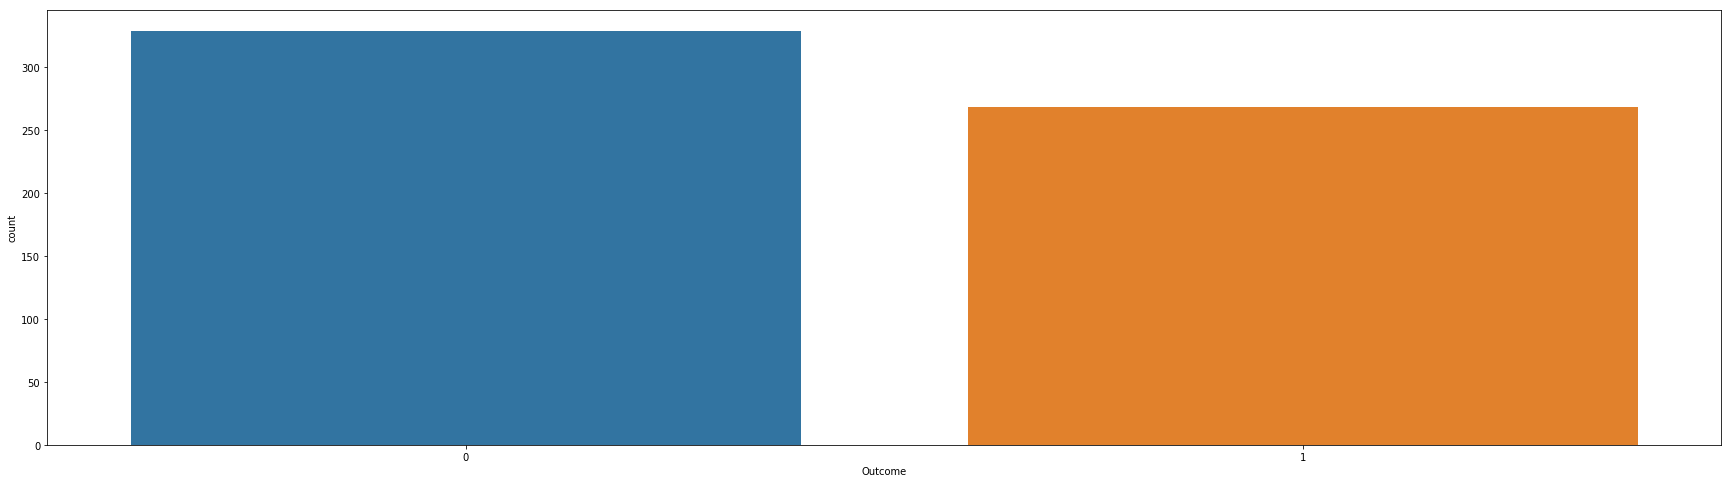

In [12]:
Outcome = pd.DataFrame(df.groupby('Outcome').size()).idxmax()[0]
df['Outcome'] = df['Outcome'].fillna(Outcome)
sns.countplot(data=df,x='Outcome')

In [13]:
df['Outcome'].value_counts()

0    329
1    268
Name: Outcome, dtype: int64

There are 329 entries with no diabetes and 268 entries with diabetes in our dataset.

EDA is also continued in Tableau. Link for them are mentioned below.

https://public.tableau.com/profile/nitin.prince.reuben#!/vizhome/EDA_diabetes/Dashboard1?publish=yes